Capstone Project - The Great Battle of Indian Cities
Project tries to explore the venues across various cities which has applications in relocation decisions, company establishments, house rental pricing etc

Import Libraries
In this section we import the libraries that will be required to process the data.

In [1]:

import numpy as np 
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

import requests 

!pip install bs4

from bs4 import BeautifulSoup

from pandas.io.json import json_normalize

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.patches as mpatches

from sklearn.cluster import KMeans

import folium

print("Libraries imported.")

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    numpy-1.18.1               |   py36h95a1406_0         5.2 MB  conda-forge
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    sci

Upload Location dataset consisting of latitude and longitude of various Indian cities
Tranform the data into a pandas dataframe

In [2]:
filename = "/resources/data/in.csv"
in_df = pd.read_csv(filename)
in_df.head(in_df.shape[0])

,city,lat,lng
0,Mumbai,18.987807,72.836447
1,Delhi,28.651952,77.231495
2,Kolkata,22.562627,88.363044
3,Chennai,13.084622,80.248357
4,Bengaluru,12.977063,77.587106
5,Hyderabad,17.384052,78.456355
6,Ahmedabad,23.025793,72.587265
7,Haora,22.576882,88.318566
8,Pune,18.513271,73.849852
9,Lucknow,26.839281,80.923133


Initialise Foursquare credentials
Get Venues for Indian cities and create relevant dataframe

In [5]:
# define Foursquare Credentials and Version
CLIENT_ID = '5QOUVRBWZQWZVWLO4WTQT5OPHHE4F5WHPKAXRH1I2ARB1OLL' # your Foursquare ID
CLIENT_SECRET = '1BRWFFULZEEPFDUBTCGGL4HPBDLN1MEIUBD1BXXOYWF0CEVQ' # your Foursquare Secret
VERSION = '20200223' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5QOUVRBWZQWZVWLO4WTQT5OPHHE4F5WHPKAXRH1I2ARB1OLL
CLIENT_SECRET:1BRWFFULZEEPFDUBTCGGL4HPBDLN1MEIUBD1BXXOYWF0CEVQ


In [6]:
radius = 15000
LIMIT = 200

venues = []

for lat, long, city in zip(in_df['lat'], in_df['lng'], in_df['city']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            city,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

convert the venues list into a new DataFrame. Group VenueCategories by City name.

In [7]:
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['City', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(2659, 7)


,City,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Mumbai,18.987807,72.836447,The St. Regis Mumbai,18.993652,72.825220,Hotel
1,Mumbai,18.987807,72.836447,High Street Phoenix,18.994967,72.825032,Shopping Mall
2,Mumbai,18.987807,72.836447,Jai Hind Lunch Home,19.002183,72.829512,Seafood Restaurant
3,Mumbai,18.987807,72.836447,Smoke House Deli,18.994478,72.824400,Restaurant
4,Mumbai,18.987807,72.836447,The Sahib Room & Kipling Bar,18.994333,72.823850,Indian Restaurant


In [8]:
def addColumn(startDf, columnTitle, dataDf):
    grouped = dataDf.groupby('City').count()
    
    for n in startDf['City']:
        try:
            startDf.loc[startDf['City'] == n,columnTitle] = grouped.loc[n, 'Venue']
        except:
            startDf.loc[startDf['City'] == n,columnTitle] = 0

In [9]:
in_grouped = venues_df.groupby('City').count()
in_grouped

,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
City,,,,,,
Ahmadnagar,6,6,6,6,6,6
Ahmedabad,100,100,100,100,100,100
Aizawl,6,6,6,6,6,6
Akola,10,10,10,10,10,10
Alwar,6,6,6,6,6,6
Bareilly,4,4,4,4,4,4
Belgaum,22,22,22,22,22,22
Bellary,4,4,4,4,4,4
Bengaluru,100,100,100,100,100,100


In [10]:
# one hot encoding
in_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
in_onehot['City'] = venues_df['City'] 

# move neighborhood column to the first column
fixed_columns = [in_onehot.columns[-1]] + list(in_onehot.columns[:-1])
in_onehot = in_onehot[fixed_columns]

in_onehot.head()

,Zoo,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Awadhi Restaurant,BBQ Joint,Bakery,Bank,Bar,Beach,Bed & Breakfast,Beer Garden,Bengali Restaurant,Big Box Store,Bistro,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Buffet,Burger Joint,Burrito Place,Bus Station,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Campground,Chaat Place,Chinese Restaurant,Chocolate Shop,City,Clothing Store,Club House,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cricket Ground,Cuban Restaurant,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dhaba,Diner,Donut Shop,English Restaurant,Event Space,Exhibit,Fabric Shop,Fast Food Restaurant,Field,Financial or Legal Service,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,General Entertainment,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Heliport,Hindu Temple,Historic Site,History Museum,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Hyderabadi Restaurant,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Intersection,Irani Cafe,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karnataka Restaurant,Kebab Restaurant,Kerala Restaurant,Korean Restaurant,Lake,Lighthouse,Lounge,Maharashtrian Restaurant,Malay Restaurant,Market,Mattress Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Mosque,Motel,Motorcycle Shop,Mountain,Movie Theater,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Museum,Music Venue,National Park,Nature Preserve,Neighborhood,Nightclub,North Indian Restaurant,Northeast Indian Restaurant,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Palace,Park,Parsi Restaurant,Performing Arts Venue,Pharmacy,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Punjabi Restaurant,Racetrack,Rajasthani Restaurant,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Stadium,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Street Food Gathering,Supermarket,Surf Spot,Sushi Restaurant,Tea Room,Temple,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Tibetan Restaurant,Tourist Information Center,Town,Track Stadium,Trail,Train Station,Travel & Transport,Udupi Restaurant,University,Vegetarian / Vegan Restaurant,Video Store,Watch Shop,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [11]:
in_grouped = in_onehot.groupby('City').mean().reset_index()
in_grouped

,City,Zoo,ATM,Accessories Store,Afghan Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Awadhi Restaurant,BBQ Joint,Bakery,Bank,Bar,Beach,Bed & Breakfast,Beer Garden,Bengali Restaurant,Big Box Store,Bistro,Boarding House,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Buffet,Burger Joint,Burrito Place,Bus Station,Business Service,Cafeteria,Café,Cajun / Creole Restaurant,Campground,Chaat Place,Chinese Restaurant,Chocolate Shop,Clothing Store,Club House,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cricket Ground,Cuban Restaurant,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Dhaba,Diner,Donut Shop,English Restaurant,Event Space,Exhibit,Fabric Shop,Fast Food Restaurant,Field,Financial or Legal Service,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,General Entertainment,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Heliport,Hindu Temple,Historic Site,History Museum,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Hyderabadi Restaurant,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Intersection,Irani Cafe,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karnataka Restaurant,Kebab Restaurant,Kerala Restaurant,Korean Restaurant,Lake,Lighthouse,Lounge,Maharashtrian Restaurant,Malay Restaurant,Market,Mattress Store,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Mosque,Motel,Motorcycle Shop,Mountain,Movie Theater,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Museum,Music Venue,National Park,Nature Preserve,Neighborhood,Nightclub,North Indian Restaurant,Northeast Indian Restaurant,Office,Optical Shop,Organic Grocery,Other Great Outdoors,Palace,Park,Parsi Restaurant,Performing Arts Venue,Pharmacy,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Punjabi Restaurant,Racetrack,Rajasthani Restaurant,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Stadium,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Street Food Gathering,Supermarket,Surf Spot,Sushi Restaurant,Tea Room,Temple,Tennis Court,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Tibetan Restaurant,Tourist Information Center,Town,Track Stadium,Trail,Train Station,Travel & Transport,Udupi Restaurant,University,Vegetarian / Vegan Restaurant,Video Store,Watch Shop,Women's Store
0,Ahmadnagar,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.333333,0.000000,0.000000,0.000000,0.00,0.000000,0.166667,0.00,0.000000,0.000000,0.

In [12]:
def find_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [13]:
num_top_venues = 15

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
city_venues_sorted = pd.DataFrame(columns=columns)
city_venues_sorted['City'] = in_grouped['City']

for ind in np.arange(in_grouped.shape[0]):
    city_venues_sorted.iloc[ind, 1:] = find_most_common_venues(in_grouped.iloc[ind, :], num_top_venues)

city_venues_sorted.head()

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Ahmadnagar,Indian Restaurant,Italian Restaurant,Pizza Place,Shopping Mall,Multiplex,Women's Store,Fast Food Restaurant,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market,Financial or Legal Service
1,Ahmedabad,Indian Restaurant,Café,Hotel,Dessert Shop,Fast Food Restaurant,Sandwich Place,Vegetarian / Vegan Restaurant,Restaurant,Tea Room,Ice Cream Shop,Multiplex,Coffee Shop,Shopping Mall,Snack Place,Bakery
2,Aizawl,Hotel,Airport,Intersection,Shopping Mall,Park,Women's Store,Fabric Shop,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market,Financial or Legal Service,Field
3,Akola,Hotel,Café,Dessert Shop,Ice Cream Shop,Indian Restaurant,Mobile Phone Shop,Airport,ATM,French Restaurant,Food Truck,Fried Chicken Joint,Food & Drink Shop,Furniture / Home Store,Food,Flea Market
4,Alwar,Resort,Platform,Shopping Mall,Clothing Store,Train Station,Pizza Place,Flea Market,Fast Food Restaurant,Field,Financial or Legal Service,Women's Store,Food,Exhibit,Food & Drink Shop,Food Court


Perform K clustering

In [15]:
# set number of clusters
kclusters = 5

in_grouped_clustering = in_grouped.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(in_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

city_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

in_merged = in_df
in_merged = in_merged.join(city_venues_sorted.set_index('City'), on='city')

in_merged.head()

,city,lat,lng,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Mumbai,18.987807,72.836447,1,Indian Restaurant,Hotel,Café,Scenic Lookout,Ice Cream Shop,Restaurant,Lounge,Bakery,Bar,Shopping Mall,Park,Chinese Restaurant,Middle Eastern Restaurant,Asian Restaurant,Italian Restaurant
1,Delhi,28.651952,77.231495,1,Indian Restaurant,Hotel,Café,Bar,Restaurant,Monument / Landmark,Coffee Shop,Bakery,Asian Restaurant,Art Gallery,South Indian Restaurant,Historic Site,History Museum,Portuguese Restaurant,Fast Food Restaurant
2,Kolkata,22.562627,88.363044,0,Hotel,Chinese Restaurant,Indian Restaurant,Shopping Mall,Café,Mughlai Restaurant,Bookstore,Restaurant,Bakery,Multiplex,Indian Sweet Shop,Bengali Restaurant,Coffee Shop,Dhaba,Pub
3,Chennai,13.084622,80.248357,1,Indian Restaurant,Hotel,Café,Juice Bar,Italian Restaurant,Multiplex,Sandwich Place,Middle Eastern Restaurant,Shopping Mall,Restaurant,Clothing Store,Department Store,Dessert Shop,BBQ Joint,Lounge
4,Bengaluru,12.977063,77.587106,1,Hotel,Indian Restaurant,Ice Cream Shop,Brewery,Pub,Breakfast Spot,Multiplex,Shopping Mall,Burger Joint,Steakhouse,South Indian Restaurant,Coffee Shop,Lounge,Snack Place,Park


In [16]:
# create map
centerLatitude = in_df["lat"].mean()
centerLongitude = in_df["lng"].mean()

print("Lats are",centerLatitude,centerLongitude )
map_clusters = folium.Map(location=[centerLatitude, centerLongitude], zoom_start=5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(in_merged['lat'], in_merged['lng'], in_merged['city'], in_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Lats are 20.28245522972973 78.83524787837837


Find most common venues seperated by clusters

In [17]:
cl1 = in_merged.loc[in_merged['Cluster Labels'] == 0, in_merged.columns[[0] + list(range(4, in_merged.shape[1]))]]
cl1

,city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
2,Kolkata,Hotel,Chinese Restaurant,Indian Restaurant,Shopping Mall,Café,Mughlai Restaurant,Bookstore,Restaurant,Bakery,Multiplex,Indian Sweet Shop,Bengali Restaurant,Coffee Shop,Dhaba,Pub
7,Haora,Hotel,Shopping Mall,Chinese Restaurant,Indian Restaurant,Café,Mughlai Restaurant,Multiplex,Bookstore,Restaurant,Bakery,Bengali Restaurant,Coffee Shop,Dhaba,Indian Sweet Shop,Asian Restaurant
10,Indore,Indian Restaurant,Coffee Shop,Hotel,Fast Food Restaurant,Pizza Place,Ice Cream Shop,Sandwich Place,Café,Shopping Mall,Restaurant,Multiplex,Tea Room,Dessert Shop,Cafeteria,Movie Theater
12,Bhopal,Pizza Place,Indian Restaurant,Coffee Shop,Train Station,Multiplex,Bakery,Shopping Mall,Department Store,Hotel,Café,Asian Restaurant,Fast Food Restaurant,Market,Breakfast Spot,Food Court
17,Jamshedpur,Hotel,Café,Multiplex,Ice Cream Shop,Market,Park,Sandwich Place,Track Stadium,Bakery,Train Station,Indian Restaurant,Pizza Place,Italian Restaurant,Food & Drink Shop,Flea Market
19,Jabalpur,Café,Boat or Ferry,Clothing Store,Shopping Mall,Gym,Fast Food Restaurant,Scenic Lookout,Chinese Restaurant,Asian Restaurant,Coffee Shop,Pizza Place,Donut Shop,Flea Market,French Restaurant,Food Truck
21,Chandigarh,Indian Restaurant,Café,Fast Food Restaurant,Hotel,Sandwich Place,Garden,Multiplex,Bakery,Coffee Shop,Pizza Place,Shopping Mall,Chinese Restaurant,Market,American Restaurant,Food Court
22,Gwalior,History Museum,Train Station,Historic Site,Multiplex,Café,Shopping Mall,Pizza Place,Fast Food Restaurant,Coffee Shop,Food & Drink Shop,Fabric Shop,Flea Market,Food Court,Financial or Legal Service,Food Truck
26,Raipur,Café,Multiplex,Shopping Mall,Hotel,Fast Food Restaurant,Pizza Place,Airport,Clothing Store,Department Store,Coffee Shop,Plaza,Ice Cream Shop,Vegetarian / Vegan Restaurant,Indian Restaurant,Italian Restaurant
28,Bhubaneshwar,Coffee Shop,Hotel,Pizza Place,Fast Food Restaurant,Italian Restaurant,Indian Restaurant,Café,Shopping Mall,Park,Asian Restaurant,Multiplex,Sandwich Place,Resort,Chinese Restaurant,Clothing Store


In [18]:
cl2 = in_merged.loc[in_merged['Cluster Labels'] == 1, in_merged.columns[[0] + list(range(4, in_merged.shape[1]))]]
cl2

,city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Mumbai,Indian Restaurant,Hotel,Café,Scenic Lookout,Ice Cream Shop,Restaurant,Lounge,Bakery,Bar,Shopping Mall,Park,Chinese Restaurant,Middle Eastern Restaurant,Asian Restaurant,Italian Restaurant
1,Delhi,Indian Restaurant,Hotel,Café,Bar,Restaurant,Monument / Landmark,Coffee Shop,Bakery,Asian Restaurant,Art Gallery,South Indian Restaurant,Historic Site,History Museum,Portuguese Restaurant,Fast Food Restaurant
3,Chennai,Indian Restaurant,Hotel,Café,Juice Bar,Italian Restaurant,Multiplex,Sandwich Place,Middle Eastern Restaurant,Shopping Mall,Restaurant,Clothing Store,Department Store,Dessert Shop,BBQ Joint,Lounge
4,Bengaluru,Hotel,Indian Restaurant,Ice Cream Shop,Brewery,Pub,Breakfast Spot,Multiplex,Shopping Mall,Burger Joint,Steakhouse,South Indian Restaurant,Coffee Shop,Lounge,Snack Place,Park
5,Hyderabad,Indian Restaurant,Hotel,Ice Cream Shop,Café,Bakery,Coffee Shop,Lounge,Multiplex,Shopping Mall,Bistro,BBQ Joint,South Indian Restaurant,Chaat Place,Historic Site,History Museum
6,Ahmedabad,Indian Restaurant,Café,Hotel,Dessert Shop,Fast Food Restaurant,Sandwich Place,Vegetarian / Vegan Restaurant,Restaurant,Tea Room,Ice Cream Shop,Multiplex,Coffee Shop,Shopping Mall,Snack Place,Bakery
8,Pune,Indian Restaurant,Bakery,Café,Ice Cream Shop,Pub,Snack Place,Hotel,Italian Restaurant,Fast Food Restaurant,South Indian Restaurant,Vegetarian / Vegan Restaurant,Lounge,Coffee Shop,Asian Restaurant,Breakfast Spot
9,Lucknow,Indian Restaurant,Fast Food Restaurant,Hotel,Café,Shopping Mall,Pizza Place,Bakery,Multiplex,Ice Cream Shop,Market,Tea Room,Flea Market,Fried Chicken Joint,Neighborhood,Nightclub
11,Vadodara,Indian Restaurant,Fast Food Restaurant,Pizza Place,Café,Multiplex,Italian Restaurant,Sandwich Place,Shopping Mall,Snack Place,BBQ Joint,Hotel,Movie Theater,Ice Cream Shop,Asian Restaurant,Coffee Shop
13,Coimbatore,Indian Restaurant,Hotel,Fast Food Restaurant,Café,Vegetarian / Vegan Restaurant,Multiplex,Restaurant,Shopping Mall,Asian Restaurant,Ice Cream Shop,Italian Restaurant,Dessert Shop,Clothing Store,Burger Joint,South Indian Restaurant


In [19]:
cl3 = in_merged.loc[in_merged['Cluster Labels'] == 2, in_merged.columns[[0] + list(range(4, in_merged.shape[1]))]]
cl3

,city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
56,Muzaffarpur,ATM,Women's Store,Restaurant,Ice Cream Shop,Convenience Store,Deli / Bodega,Department Store,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market
59,Brahmapur,ATM,Women's Store,Convenience Store,Train Station,Shopping Mall,Pizza Place,Indian Restaurant,Food,Field,Financial or Legal Service,Flea Market,Food & Drink Shop,Fabric Shop,Food Court,Food Truck
70,Tharati Etawah,ATM,Train Station,Clothing Store,Indian Restaurant,Women's Store,Fast Food Restaurant,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market,Financial or Legal Service


In [20]:
cl4 = in_merged.loc[in_merged['Cluster Labels'] == 3, in_merged.columns[[0] + list(range(4, in_merged.shape[1]))]]
cl4

,city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
30,Bareilly,Shopping Mall,Convenience Store,Accessories Store,Fast Food Restaurant,Gaming Cafe,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market,Financial or Legal Service,Field
42,Ujjain,Train Station,Pizza Place,Shopping Mall,Market,Women's Store,Fabric Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market,Financial or Legal Service,Field
45,Gulbarga,Train Station,Shopping Mall,Mobile Phone Shop,Bus Station,Women's Store,Fast Food Restaurant,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market,Financial or Legal Service,Field


In [21]:
cl5 = in_merged.loc[in_merged['Cluster Labels'] == 4, in_merged.columns[[0] + list(range(4, in_merged.shape[1]))]]
cl5

,city,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
20,Bhilai,Café,Sculpture Garden,Pizza Place,Hotel,Women's Store,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market,Financial or Legal Service,Field,Fast Food Restaurant,Fabric Shop
36,Raurkela,Train Station,Café,Hotel,Ice Cream Shop,Exhibit,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market,Financial or Legal Service,Field,Fast Food Restaurant
62,Khammam,Café,Train Station,Restaurant,Women's Store,Fabric Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food Court,Food & Drink Shop,Food,Flea Market,Financial or Legal Service,Field,Fast Food Restaurant


Creat Waffle Chart to indicate clusters clount across India

In [22]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (categories[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]
    #print(values_cumsum)

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        #color_val = colormap((float(values_cumsum[i])/total_values))
        color_val = colormap(np.linspace(0,1,5)[i])
        #print(np.arange(1,6)[i]/5)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

Total number of tiles is 730
Cluster I: 296
Cluster II: 345
Cluster III: 30
Cluster IV: 30
Cluster V: 30


<Figure size 432x288 with 0 Axes>

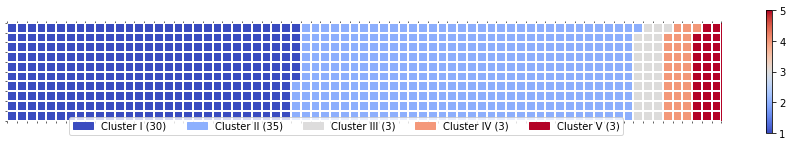

In [23]:
index = ['Cluster I', 'Cluster II', 'Cluster III', 'Cluster IV','Cluster V']
portions = [cl1.shape[0], cl2.shape[0], cl3.shape[0], cl4.shape[0], cl5.shape[0]]
width = 73 # width of chart
height = 10 # height of chart

categories = index # categories
values = portions # correponding values of categories

colormap = plt.cm.coolwarm# color map class
create_waffle_chart(categories, values, height, width, colormap)